In [ ]:
import cv2
import glob
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import tensorflow as tf

In [ ]:
video = 1
tracking = np.loadtxt("drive/MyDrive/cs230-tracking/model_1/tracking_{:02d}.txt".format(video), delimiter=",")
# image_files = sorted(glob.glob("drive/MyDrive/cs230-data/test/MOT16-{:02d}/img1/*.jpg".format(video)))

In [ ]:
header = {'bb_height': 5,
 'bb_left': 2,
 'bb_top': 3,
 'bb_width': 4,
 'conf': 6,
 'frame': 0,
 'id': 1,
 'x': 7,
 'y': 8,
 'z': 9}                                                               

## Visualize the test tracking results for the first few frames of a video

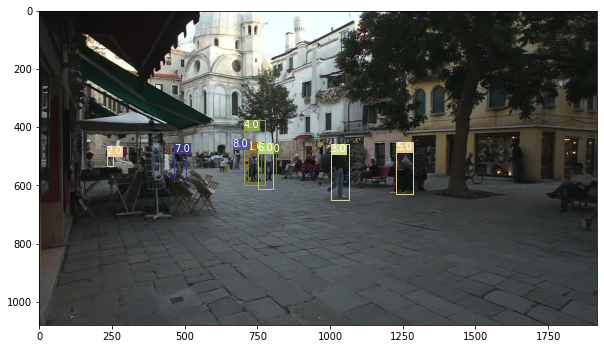

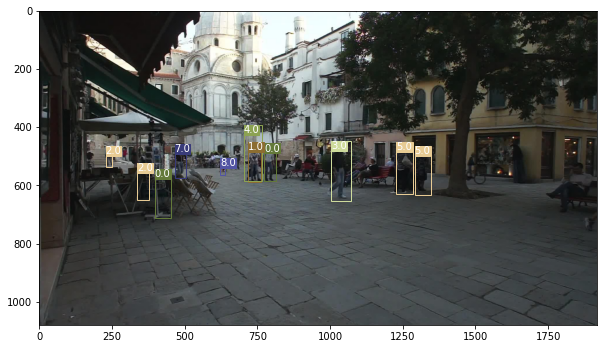

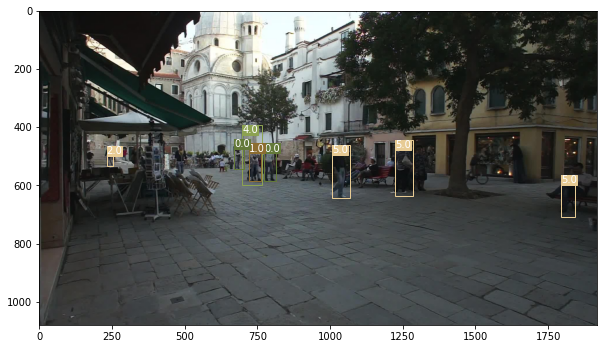

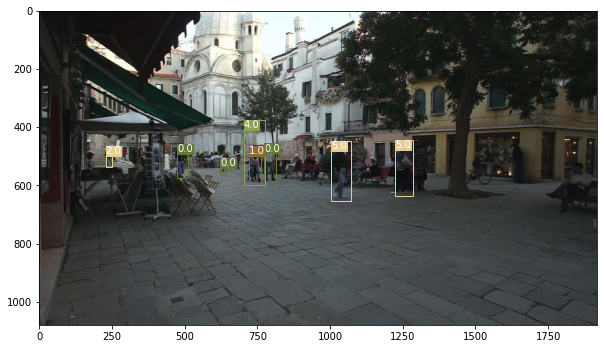

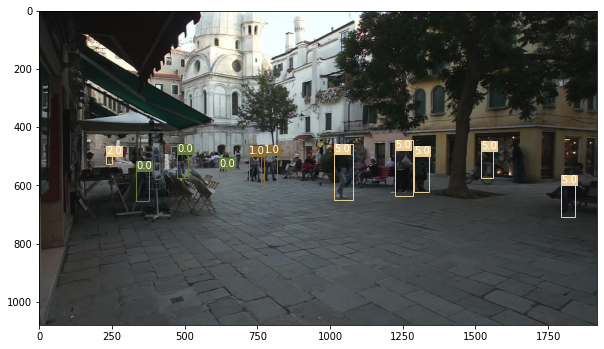

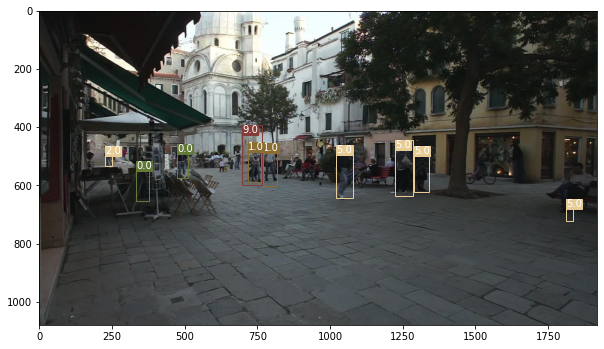

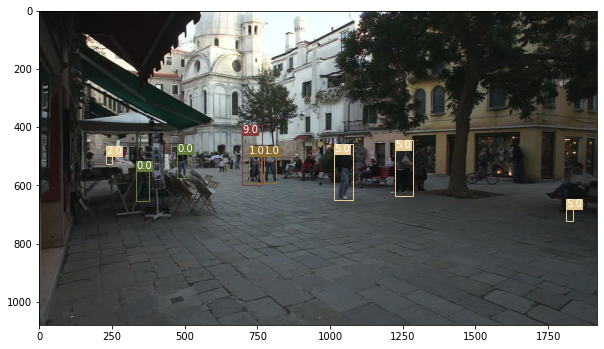

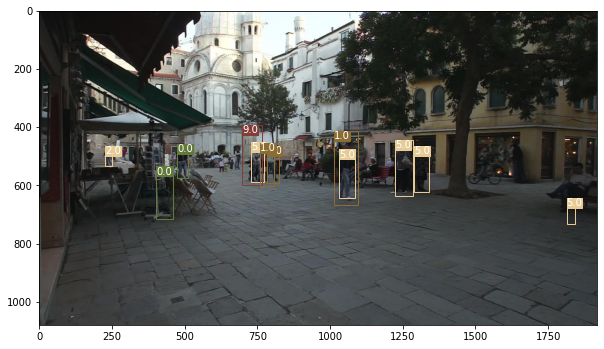

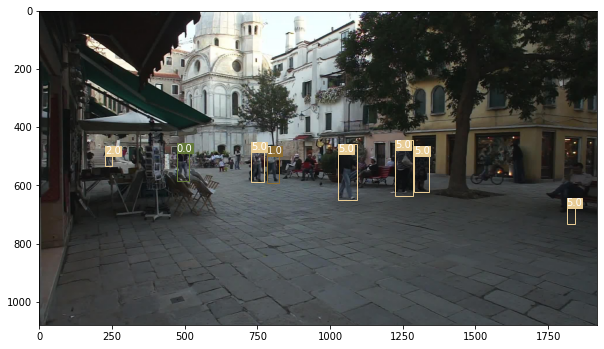

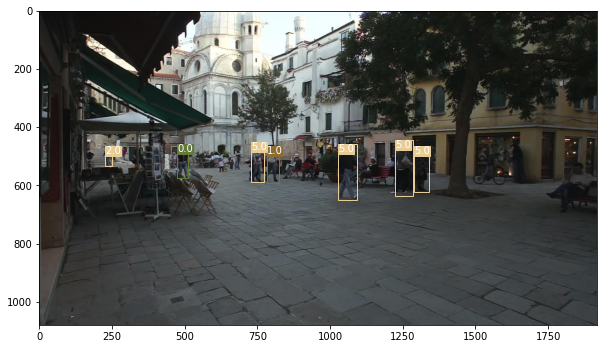

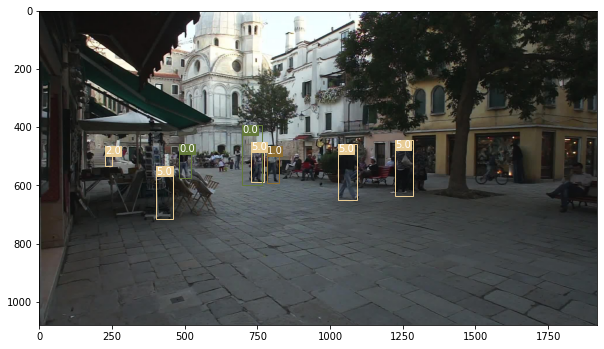

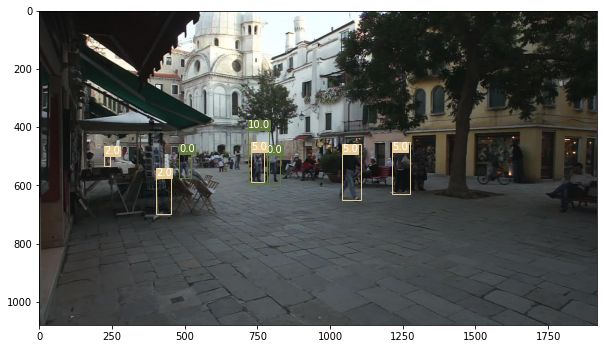

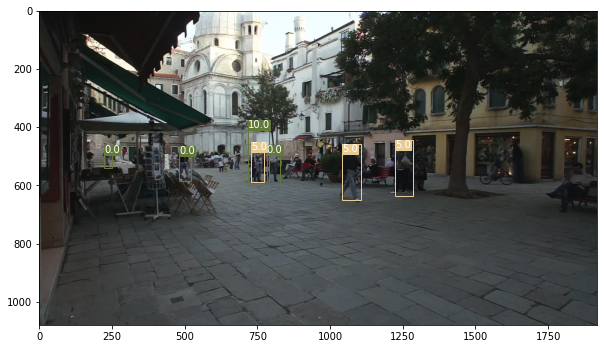

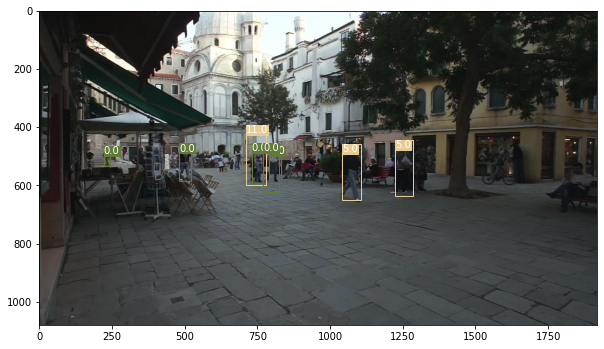

In [ ]:
frame_range = (1,15)
ids = sorted(np.unique(tracking[:,header['id']]).tolist())
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, len(ids))]
id_color_map = {id_:random.sample(colors,1)[0] for id_ in ids}

for frame in range(*frame_range):
    frame_tracking = tracking[tracking[:,header["frame"]]==frame]
    frame_image = cv2.imread("drive/MyDrive/cs230-data/test/MOT16-{:02d}/img1/{:06d}.jpg".format(video, frame))
    frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(frame_image)
    # for i in range(len(det)):
    #     x,y,w,h = det[i,2:6]
    #     bb = patches.Rectangle((x,y),w,h, linewidth=1, edgecolor='g', facecolor='none')
    #     ax.add_patch(bb)
    for row in frame_tracking:
        id_,x,y,w,h = row[1:6]
        color = id_color_map[id_]
        bb = patches.Rectangle((x,y),w,h, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(bb)
        plt.text(x, y, s="{}".format(id_-1), 
            color='white', verticalalignment='top',
            bbox={'color': color, 'pad': 0})
    plt.show()